# 房价预测 - 回归问题

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 导入并处理数据

### 导入数据

In [2]:
df = pd.read_csv('data1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
2104      46 non-null int64
3         46 non-null int64
399900    46 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [3]:
df.columns = ['area', 'room_count', 'menoy']
df.head()

,area,room_count,menoy
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


### 数据提取

In [4]:
x_data = df[['area', 'room_count']].values
print(x_data.shape)
x_data[:3]

(46, 2)


array([[1600,    3],
       [2400,    3],
       [1416,    2]], dtype=int64)

In [5]:
y_data = df['menoy'].values
y_data.shape = (46,1)
y_data[:3]

array([[329900],
       [369000],
       [232000]], dtype=int64)

### 数据标准化

最小-最大规范化 MaxAbsScaler 效果更好

### 最小-最大规范化 MaxAbsScaler

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_data = scaler.fit_transform(x_data)
print(x_data[:3])

scaler = MinMaxScaler()
y_data = scaler.fit_transform(y_data)
print(y_data[:3])

[[0.20628792 0.5       ]
 [0.42691671 0.5       ]
 [0.1555433  0.25      ]]
[[0.30188679]
 [0.37566038]
 [0.11716981]]


## 搭建模型

### 定义add_layer()函数

In [7]:
# 参数：(输入数据, 前一个神经元个数, 下一层神经元个数, 激活函数)
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

### 定义占位符

In [8]:
# x,y 样本,一定要是浮点数。None代表无论输入有多少都可以
x = tf.placeholder(tf.float32, [None, 2]) # 两个输入变量
y = tf.placeholder(tf.float32, [None, 1]) # 一个输出变量

### 搭建网络

In [9]:
# 第一层网络
Z1 = add_layer(x, 2, 10, tf.nn.tanh)
# 第二层网络
predition = add_layer(Z1, 10, 1, tf.nn.tanh)

In [10]:
# 损失函数
loss = tf.reduce_mean(tf.square(y - predition))

In [11]:
# 使用梯度下降法最小化误差以此来更新权重
train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

## 训练模型

### 启动会话

In [12]:
# 初始化变量  
init = tf.global_variables_initializer()

In [13]:
# 启动会话
sess = tf.Session()
sess.run(init)

### 开始训练

In [14]:
for step in range(1000):
    sess.run(train, feed_dict={x:x_data, y:y_data})

### 获取预测值

In [15]:
# 获取预测值
prediction_value = sess.run(predition, feed_dict={x: x_data})
for i in range(len(y_data)):
    print('预测值：', prediction_value[i], '真实值：', y_data[i])

预测值： [0.21130951] 真实值： [0.30188679]
预测值： [0.47146627] 真实值： [0.37566038]
预测值： [0.23006406] 真实值： [0.11716981]
预测值： [0.57954943] 真实值： [0.69811321]
预测值： [0.29413778] 真实值： [0.24528302]
预测值： [0.18739076] 真实值： [0.27358491]
预测值： [0.14816882] 真实值： [0.05490377]
预测值： [0.13080224] 真实值： [0.07943396]
预测值： [0.1727864] 真实值： [0.13698113]
预测值： [0.27933267] 真实值： [0.13226226]
预测值： [0.34954828] 真实值： [0.33415094]
预测值： [0.3129056] 真实值： [0.30207358]
预测值： [0.7786117] 真实值： [1.]
预测值： [0.08918544] 真实值： [0.16981132]
预测值： [0.3937649] 真实值： [0.52830189]
预测值： [0.19482416] 真实值： [0.24528302]
预测值： [0.07725476] 真实值： [0.05660377]
预测值： [0.4826464] 真实值： [0.62282642]
预测值： [0.5864383] 真实值： [0.80962264]
预测值： [0.27060932] 真实值： [0.15660377]
预测值： [0.39134383] 真实值： [0.16056604]
预测值： [0.21275136] 真实值： [0.13773585]
预测值： [0.28658563] 真实值： [0.16981132]
预测值： [0.75086653] 真实值： [0.76226415]
预测值： [0.02649392] 真实值： [0.1509434]
预测值： [0.15958135] 真实值： [0.55584906]
预测值： [0.5057512] 真实值： [0.56433962]
预测值： [0.41288197] 真实值： [0.57566038]
预测值： [0.

### 可视化

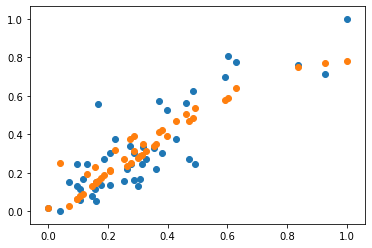

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

# 画图
plt.figure()
# plt.ion()  #interactive mode on
# 绘制样本点，真实值
plt.scatter(x_data[:, 0], y_data)
# 预测结果
plt.scatter(x_data[:, 0], prediction_value)
plt.pause(0.001)
plt.show()